Step 1: Import Libraries

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

Step 2: Load the Dataset

In [2]:
# Load the dataset
data = pd.read_csv('solar energy prediction.csv')

Step 3: Data Preprocessing

In [3]:
# Check for missing values
missing_values = data.isnull().sum()

In [5]:
# Drop the Date and Time columns as they are not needed for prediction
data.drop(['Date', 'Time'], axis=1, inplace=True)

In [6]:
# Handle any missing values if necessary
# Here, we will fill missing values with the mean of the column
data.fillna(data.mean(), inplace=True)

In [7]:
# Display the cleaned data
data.head()

,Elevation,Temperature,Humidity,Solar_Irradiance,Cloud_Cover,Wind_Speed,Solar_Production
0,9,18,47,181,0.403711,2.945207,484
1,7,22,34,173,0.310021,1.284892,716
2,8,35,68,205,0.078912,5.240299,105
3,1,16,82,141,0.137084,6.497072,125
4,4,22,30,436,0.261074,6.615704,803


Step 4: Exploratory Data Analysis (EDA)

In [8]:
# Basic statistics of the dataset
print(data.describe())

         Elevation  Temperature     Humidity  Solar_Irradiance  Cloud_Cover  \
count  1000.000000  1000.000000  1000.000000       1000.000000  1000.000000   
mean      4.415000    24.206000    59.128000        448.648000     0.254872   
std       2.826794     8.741738    17.503885        198.560758     0.142427   
min       0.000000    10.000000    30.000000        100.000000     0.001409   
25%       2.000000    16.000000    44.750000        278.750000     0.131339   
50%       4.000000    24.000000    59.000000        450.500000     0.264057   
75%       7.000000    32.000000    74.000000        613.000000     0.376731   
max       9.000000    39.000000    89.000000        799.000000     0.499948   

        Wind_Speed  Solar_Production  
count  1000.000000       1000.000000  
mean      5.515777        542.961000  
std       2.591994        257.773906  
min       1.000297        102.000000  
25%       3.287294        321.500000  
50%       5.462776        542.000000  
75%       7.827

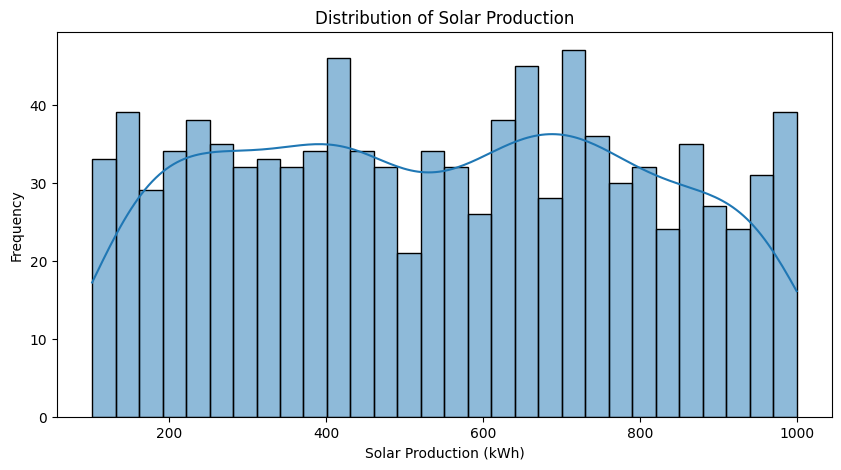

In [9]:
# Visualize the distribution of the target variable
plt.figure(figsize=(10, 5))
sns.histplot(data['Solar_Production'], bins=30, kde=True)
plt.title('Distribution of Solar Production')
plt.xlabel('Solar Production (kWh)')
plt.ylabel('Frequency')
plt.show()

<Figure size 1200x800 with 0 Axes>

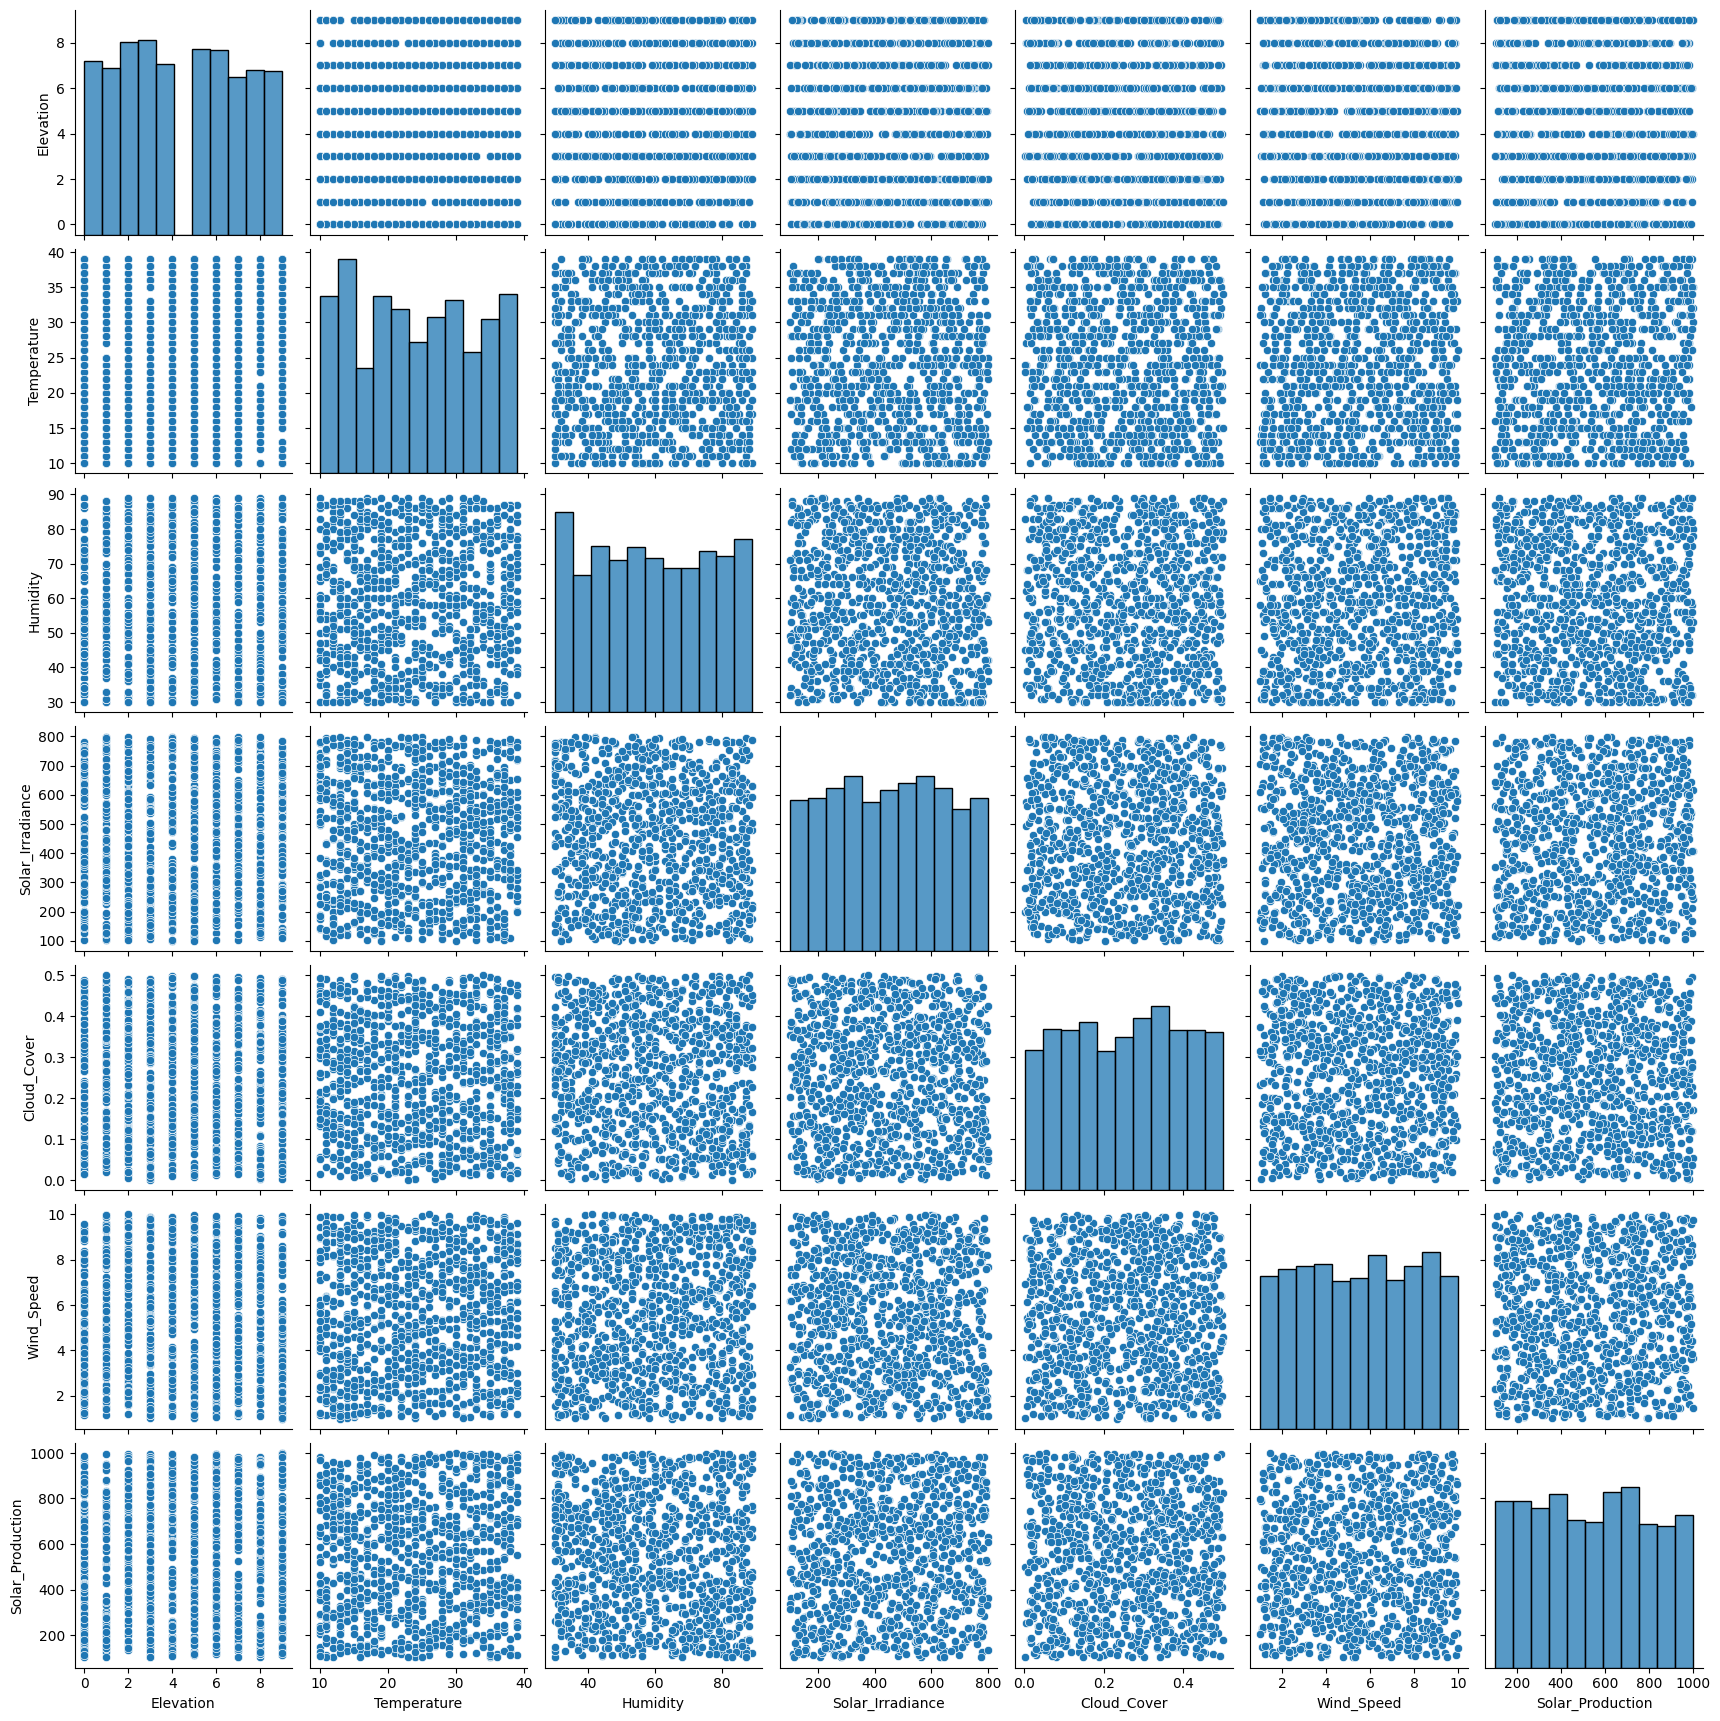

In [10]:
# Visualize relationships between features and target variable
plt.figure(figsize=(12, 8))
sns.pairplot(data)
plt.show()

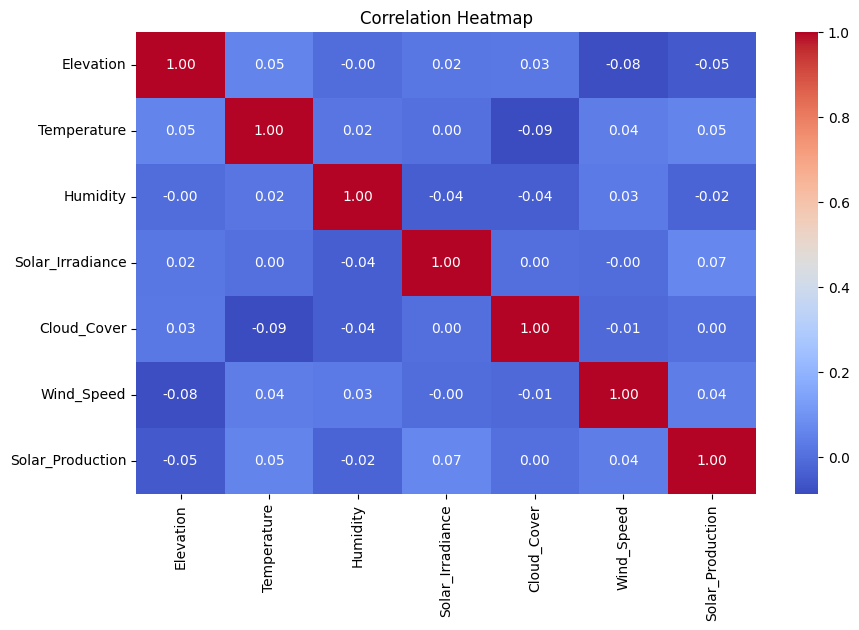

In [11]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Step 5: Feature Engineering

In [12]:
# Ensure the column names are correctly referenced
sunlight_hours_col = 'Solar_Production'  # Adjust if necessary
solar_irradiance_col = 'Solar_Irradiance'  # Adjust if necessary

# Check if the columns exist
if sunlight_hours_col in data.columns and solar_irradiance_col in data.columns:
    data['Effective_Solar_Hours'] = data[solar_irradiance_col] * data[sunlight_hours_col] / 1000
else:
    print(f"Columns '{sunlight_hours_col}' or '{solar_irradiance_col}' not found in the DataFrame.")

Step 6: Split the Data into X and Y

In [13]:
# Separate features and target variable
X = data.drop('Solar_Production', axis=1)  # Features
y = data['Solar_Production']                # Target variable

Step 7: Training and Testing Data

In [14]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Normalize the data (feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Step 8: Train the Data

In [16]:
# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

In [17]:
# Train the models
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)

Step 9: Predict the Data

In [18]:
# Initialize a dictionary to store predictions
predictions = {}

In [19]:
# Predict using each model
for model_name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    predictions[model_name] = y_pred

Step 10: Model Evaluation Metrics

In [20]:
# Initialize a dictionary to store evaluation metrics
results = {}

In [21]:
# Evaluate each model
for model_name, y_pred in predictions.items():
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {
        'Mean Squared Error': mse,
        'R-squared': r2
    }

In [22]:
# Display the evaluation metrics for each model
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  Mean Squared Error: {metrics['Mean Squared Error']:.2f}")
    print(f"  R-squared: {metrics['R-squared']:.2f}\n")

Linear Regression:
  Mean Squared Error: 11508.09
  R-squared: 0.82

Decision Tree Regressor:
  Mean Squared Error: 2644.93
  R-squared: 0.96

Random Forest Regressor:
  Mean Squared Error: 670.78
  R-squared: 0.99

Support Vector Regressor:
  Mean Squared Error: 58257.48
  R-squared: 0.09

K-Nearest Neighbors:
  Mean Squared Error: 25878.83
  R-squared: 0.60

